# Mind Awake; Body Asleep

---

## Print

To query the Spotify API called _Mind Awake; Body Asleep_, you can use the following code.

First of all we print a big title in shell using the `pyfiglet` library.

```python
    import pyfiglet 

    text = "MIND AWAKE ; BODY ASLEEP"
    in_list = list(ch for ch in text)

    print(pyfiglet.figlet_format(in_list, font="banner3-D"))
```

In [1]:
import pyfiglet # type: ignore
from tabulate import tabulate # type: ignore
import pandas as pd # type: ignore

text = "MIND AWAKE ; BODY ASLEEP"
in_list = list(ch for ch in text)

print(pyfiglet.figlet_format(in_list, font="banner3-D"))

'##::::'##:'####:'##::: ##:'########::
 ###::'###:. ##:: ###:: ##: ##.... ##:
 ####'####:: ##:: ####: ##: ##:::: ##:
 ## ### ##:: ##:: ## ## ##: ##:::: ##:
 ##. #: ##:: ##:: ##. ####: ##:::: ##:
 ##:.:: ##:: ##:: ##:. ###: ##:::: ##:
 ##:::: ##:'####: ##::. ##: ########::
..:::::..::....::..::::..::........:::
:::'###::::'##:::::'##::::'###::::'##:::'##:'########::::'####:
::'## ##::: ##:'##: ##:::'## ##::: ##::'##:: ##.....::::: ####:
:'##:. ##:: ##: ##: ##::'##:. ##:: ##:'##::: ##::::::::::....::
'##:::. ##: ##: ##: ##:'##:::. ##: #####:::: ######::::::'####:
 #########: ##: ##: ##: #########: ##. ##::: ##...::::::: ####:
 ##.... ##: ##: ##: ##: ##.... ##: ##:. ##:: ##::::::::::. ##::
 ##:::: ##:. ###. ###:: ##:::: ##: ##::. ##: ########:::: ##:::
..:::::..:::...::...:::..:::::..::..::::..::........:::::.:::::
'########:::'#######::'########::'##:::'##:
 ##.... ##:'##.... ##: ##.... ##:. ##:'##::
 ##:::: ##: ##:::: ##: ##:::: ##::. ####:::
 ########:: ##:::: ##: ##:::: ##:::. ##::::


As an alternative, you can use the `tabulate` library to print in a table format.

```python
    import pandas as pd
    from tabulate import tabulate

    in_df = pd.DataFrame(in_list).T
    print(tabulate(in_df, headers='', tablefmt='fancy_grid', showindex=False))
```

In [2]:
def tabprint(x: any, headers: list, index: bool) -> None:
    # Check if data type is compatible
    # Don't use 'tabulate' if data type is not compatible
    if headers == [] or headers == '':
        headers = 'keys'
    try:
        print(tabulate(x, headers=headers, tablefmt='fancy_grid', showindex=index, numalign='left', stralign='left'))
    except Exception as e:
        print(f'Error, dtype not compatible with tabulate: {e}')
        print(x) 

in_df = pd.DataFrame(in_list).T

tabprint(in_df, headers=in_df.loc[0].tolist(), index=False)

╒═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╕
│ M   │ I   │ N   │ D   │     │ A   │ W   │ A   │ K   │ E   │     │ ;   │     │ B   │ O   │ D   │ Y   │     │ A   │ S   │ L   │ E   │ E   │ P   │
╞═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╡
│ M   │ I   │ N   │ D   │     │ A   │ W   │ A   │ K   │ E   │     │ ;   │     │ B   │ O   │ D   │ Y   │     │ A   │ S   │ L   │ E   │ E   │ P   │
╘═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╛


## CSV to DataFrame

Reads a CSV file containing concert data and performs various data transformations, sucha as:
- Parsing 'DateTime' column as datetime
- Splitting 'Address' column into 'City' column
- Adding 'Month' column with month and year in MMM YYYY format
- Selecting columns 'Artist', 'City', 'DateTime', 'Price', 'Distance'
- Changing datatype of columns 'Distance' and 'Price' to float

Parameters:
    file_path (str): The path to the CSV file.
Returns:
    pandas.DataFrame: The transformed DataFrame with selected columns and modified data types.


```python
    def read_concert_data(file_path):
        delimiter = ';'
        parse_dates = ['DateTime']
        dayfirst = True
        df = pd.read_csv(file_path, delimiter=delimiter, parse_dates=parse_dates, dayfirst=dayfirst)
        
        #df['DateTime'] = pd.to_datetime(df['DateTime'])
        
        df['City'] = df['Address'].str.split().str[-1]
        
        #df['Month'] = df['DateTime'].dt.strftime('%b %Y')
        #df = df[['DateTime', 'Month', 'City', 'Artist', 'Price', 'Distance']]
        df = df[['DateTime', 'City', 'Artist', 'Price', 'Distance']]
        df['Distance'] = df['Distance'].str.replace(',', '.').astype(float)
        df['Price'] = df['Price'].str.replace(',', '.').astype(float)

        # Sort by DateTime ascending
        df = df.sort_values('DateTime', inplace=True)

        tabprint(df, 'keys', 0)
        return df
```

In [3]:
file_path = r"C:\Users\mcontini\Desktop\GitHub\public\Season\tbl_eu_concerti.csv"

delimiter = ';'
parse_dates = ['DateTime']
dayfirst = True
df_csv = pd.read_csv(file_path, delimiter=delimiter, parse_dates=parse_dates, dayfirst=dayfirst)

def read_concert_data(df):

    X = df.copy()

    X['City'] = X['Address'].str.split().str[-1]

    X = X[['DateTime', 'City', 'Artist', 'Price', 'Distance']]
 
    X['Distance'] = X['Distance'].str.replace(',', '.').astype(float)

    X['Price'] = X['Price'].str.replace(',', '.').astype(float)

    # Sort by DateTime ascending
    X = X.sort_values('DateTime')

    #tabprint(X, '', 1)
    return X

df_read = read_concert_data(df_csv)
df_read

,DateTime,City,Artist,Price,Distance
0,2024-10-29 20:30:00,Berlin,Sungazer,30.80,831.2
1,2024-11-13 20:00:00,Novegro,Chelsea Wolfe,30.00,6.2
2,2024-12-13 20:00:00,Metz,Tigran Hamasyan,37.00,460.2
3,2025-01-01 20:00:00,NaN,NaN,NaN,NaN
4,2025-02-25 20:00:00,Paris,Animals As Leaders,43.65,637.5
5,2025-03-06 19:00:00,Milano,Animals As Leaders,34.50,10.3
6,2025-04-02 20:30:00,Antwerpen,Tigran Hamasyan,21.00,723.4
7,2025-05-19 20:15:00,Basel,Hiromi Uehara,41.66,257.8


## Calculated Fields

 - `Month`: Column 'DateTime' formatted as 'MMM YYYY' (obj)
 - `price_perc`: 'Price' divided by the sum of all prices (float)
 - `distance_perc`: 'Distance' divided by the sum of all distances (float)

We will also need another column to summarize `price_perc` and `distance_perc` in a single aggreagated value which relates km and €.

```python
    def calculate_columns(df):

        df = df.dropna()
        df['Month'] = df['DateTime'].dt.strftime('%b %Y')

        df = df[['Month', 'City', 'Artist', 'Price', 'Distance']]

            # Normalizzazione Z-score
        df['Z_Price'] = (df['Price'] - df['Price'].mean()) / df['Price'].std()
        df['Z_Distance'] = (df['Distance'] - df['Distance'].mean()) / df['Distance'].std()

            # Calcolo dell'interazione
        df['Price_Distance_Interaction'] = df['Z_Price'] * df['Z_Distance']

        tabprint(df, '', 0)
        return df
```

In [4]:
def calculate_columns(df):

    X = df.copy()
    # Drop rows with NaN values
    X = X.dropna()
    X['Month'] = X['DateTime'].dt.strftime('%b %Y')
    X['Days_between'] = X['DateTime'].diff().dt.days.fillna(0).astype(int)

    X = X[['Month', 'Days_between', 'City', 'Artist', 'Price', 'Distance']]

    X['Cost_per_km'] = X['Price'] / X['Distance']
    X['Cost_per_km'] = X['Cost_per_km'].round(2)

    #print(X.dtypes)

    # Normalizzazione Z-score (2 cifre decimali)
        # Media 0 e Deviazione Standard 1
    X['Z_Price'] = (X['Price'] - X['Price'].mean()) / X['Price'].std()
    X['Z_Price'] = X['Z_Price'].round(2)
        # Media 0 e Deviazione Standard 1
    X['Z_Distance'] = (X['Distance'] - X['Distance'].mean()) / X['Distance'].std()
    X['Z_Distance'] = X['Z_Distance'].round(2)

    # Calcolo dell'interazione
    X['Price_Distance_Interaction'] = X['Z_Price'] * X['Z_Distance']
    X['Price_Distance_Interaction'] = X['Price_Distance_Interaction'].round(2)

    return X

y = calculate_columns(df_read)
y

,Month,Days_between,City,Artist,Price,Distance,Cost_per_km,Z_Price,Z_Distance,Price_Distance_Interaction
0,Oct 2024,0,Berlin,Sungazer,30.80,831.2,0.04,-0.43,1.23,-0.53
1,Nov 2024,14,Novegro,Chelsea Wolfe,30.00,6.2,4.84,-0.53,-1.23,0.65
2,Dec 2024,30,Metz,Tigran Hamasyan,37.00,460.2,0.08,0.38,0.13,0.05
4,Feb 2025,74,Paris,Animals As Leaders,43.65,637.5,0.07,1.24,0.65,0.81
5,Mar 2025,8,Milano,Animals As Leaders,34.50,10.3,3.35,0.05,-1.22,-0.06
6,Apr 2025,27,Antwerpen,Tigran Hamasyan,21.00,723.4,0.03,-1.70,0.91,-1.55
7,May 2025,46,Basel,Hiromi Uehara,41.66,257.8,0.16,0.98,-0.48,-0.47


## Graphs

### Price, Distance vs Month

We could create a line or bar chart to show how `price` and `distance` vary `month` by `month`.

In [5]:
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

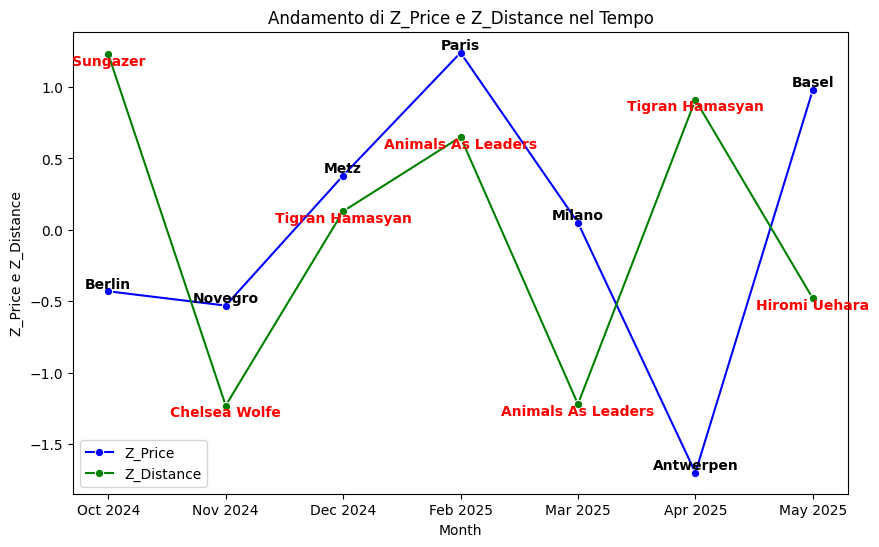

In [6]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=y, x='Month', y='Z_Price', marker='o', label='Z_Price', color='blue')
sns.lineplot(data=y, x='Month', y='Z_Distance', marker='o', color='green', label='Z_Distance')

for i, j, city in zip(y['Month'], y['Z_Price'], y['City']):
    plt.text(i, j, city, color='black', ha='center', va='bottom', fontsize=10, fontweight='bold')  

for i, j, city in zip(y['Month'], y['Z_Distance'], y['Artist']):
    plt.text(i, j, city, color='red', ha='center', va='top', fontsize=10, fontweight='bold')
plt.title('Andamento di Z_Price e Z_Distance nel Tempo')

plt.ylabel('Z_Price e Z_Distance')
plt.legend()
plt.show()


### Cost per Km

Histogram of the cost per km, which is the ratio between `Price` and `Distance`.

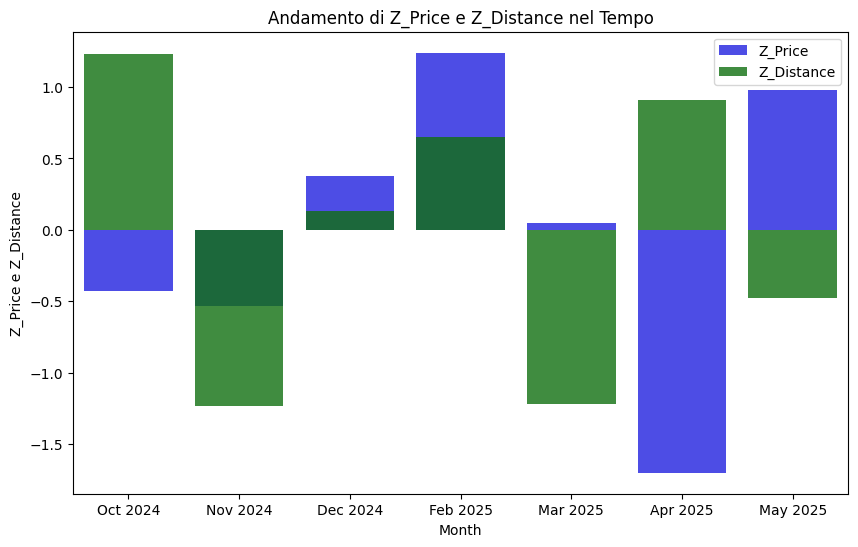

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(data=y, x='Month', y='Z_Price', color='blue', label='Z_Price', alpha=0.8)
sns.barplot(data=y, x='Month', y='Z_Distance', color='green', label='Z_Distance', alpha=0.8)
plt.title('Andamento di Z_Price e Z_Distance nel Tempo')

plt.ylabel('Z_Price e Z_Distance')
plt.legend()
plt.show()


### Z_Price, Z_Distance vs Month

Here is a line chart to show how `Z_Price` and `Z_Distance` vary `month` by `month`.  
The Z-score is a measure of how many standard deviations an element is from the mean.  

Those two parameters are useful to understand how the `Price` and `Distance` values are distributed with respect to the mean.

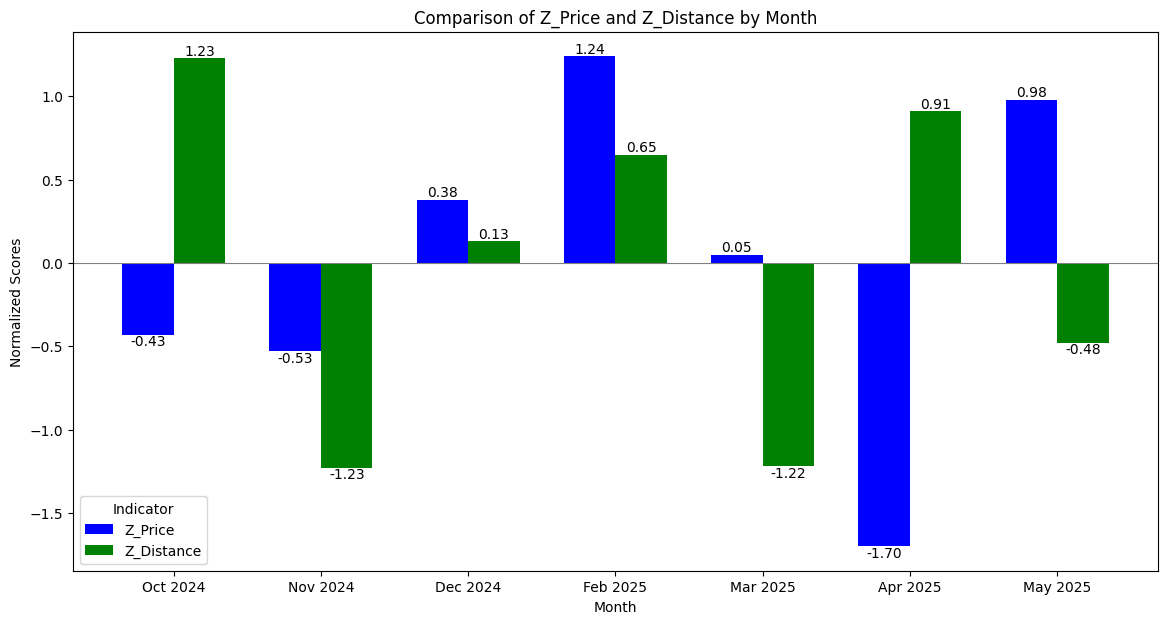

In [8]:
df = y.copy()
# Assumiamo che 'df' sia il tuo DataFrame

# Calcolo delle posizioni delle barre
positions = range(len(df['Month']))  # Posizioni per i mesi
bar_width = 0.35  # Larghezza delle barre

# Creazione del grafico
plt.figure(figsize=(14, 7))

# Barre per Z_Price
bars1 = plt.bar([p - bar_width/2 for p in positions], df['Z_Price'], width=bar_width, color='blue', label='Z_Price')

# Barre per Z_Distance
bars2 = plt.bar([p + bar_width/2 for p in positions], df['Z_Distance'], width=bar_width, color='green', label='Z_Distance')

# Aggiungere etichette ai bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')
        else:
            plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='top')

add_labels(bars1)
add_labels(bars2)

# Linea orizzontale a y=0
plt.axhline(0, color='gray', linewidth=0.8)

# Aggiungere etichette, titolo e legenda
plt.xlabel('Month')
plt.ylabel('Normalized Scores')
plt.title('Comparison of Z_Price and Z_Distance by Month')
plt.xticks(positions, df['Month'])  # Impostazione delle etichette x ai mesi
plt.legend(title='Indicator')

# Mostrare il grafico
plt.show()


### Price-Distance Interaction

This scatter plot shows the interaction between `Price` and `Distance`.  

The interaction is calculated as the product of the Z-scores of `Price` and `Distance`.  

This is useful to understand how the two variables are related to each other.



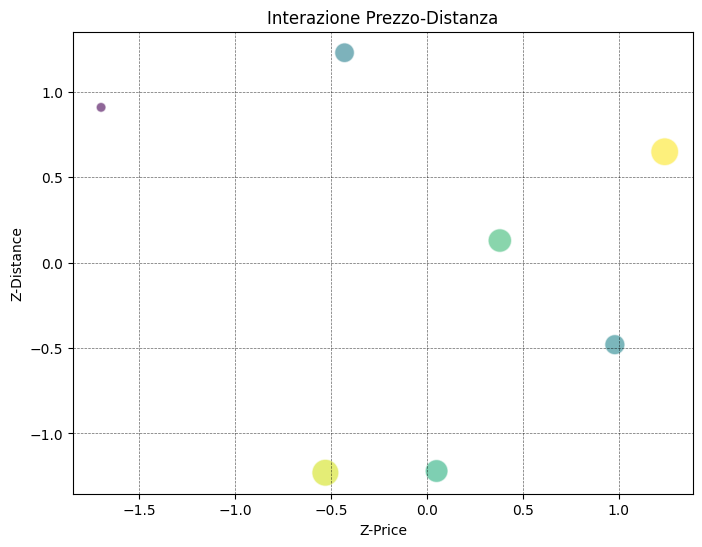

In [9]:
plt.figure(figsize=(8, 6))

# Non mostrare la legenda, però mostra il valore di ogni punto
sns.scatterplot(data=y, x='Z_Price', y='Z_Distance', size='Price_Distance_Interaction', sizes=(50, 400), alpha=0.6, legend=False, hue='Price_Distance_Interaction', palette='viridis')

plt.title('Interazione Prezzo-Distanza')
plt.xlabel('Z-Price')
plt.ylabel('Z-Distance')
#plt.legend(title='Interazione Prezzo-Distanza')
plt.grid(True, linestyle='--', alpha=0.6, color='black', linewidth=0.5, axis='both', zorder=1)
plt.show()


### Days Between Events

A simple histogram showing how many days are between each event.

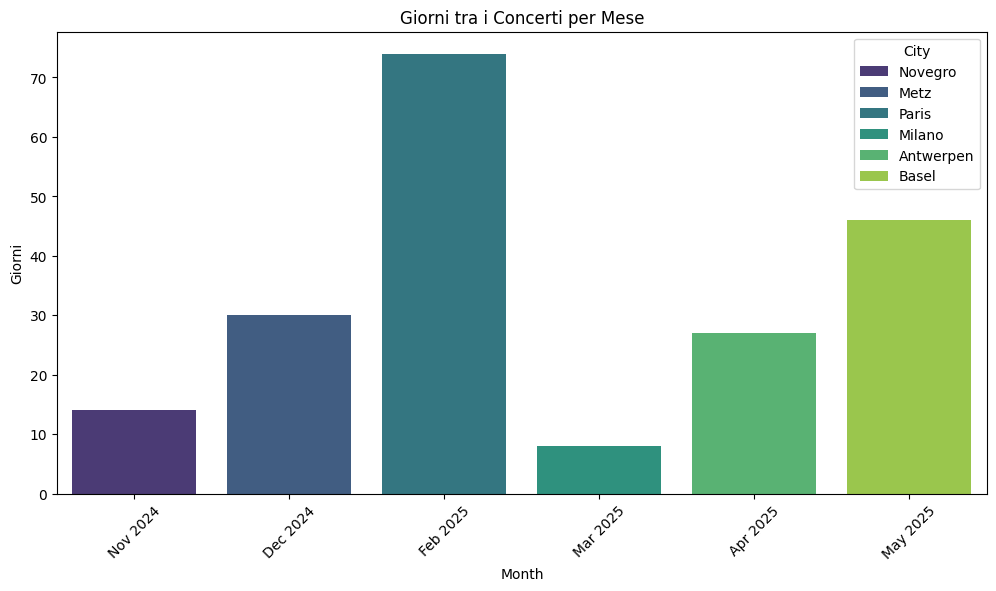

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(data=y.iloc[1:], x='Month', y='Days_between', palette='viridis', hue='City')
plt.title('Giorni tra i Concerti per Mese')
plt.xticks(rotation=45)
plt.ylabel('Giorni')
plt.show()